In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy

import axelrod as axl
assert axl.__version__ == '4.8.0'

# Plot of rank versus reported rank for a given seed

In [8]:
axl.seed(0)
first_tournament_participants_ordered_by_reported_rank = [ 
    axl.TitForTat(),
    axl.FirstByTidemanAndChieruzzi(),
    axl.FirstByNydegger(),
    axl.FirstByGrofman(),
    axl.FirstByShubik(),
    axl.FirstBySteinAndRapoport(),
    axl.Grudger(),
    axl.FirstByDavis(),
    axl.FirstByGraaskamp(),
    axl.FirstByDowning(),
    axl.FirstByFeld(),
    axl.FirstByJoss(),
    axl.FirstByTullock(),
    axl.FirstByAnonymous(),
    axl.Random(),
]
number_of_strategies = len(first_tournament_participants_ordered_by_reported_rank)

In [6]:
number_of_turns = 200
number_of_repetitions = 500
tournament = axl.Tournament(
    players=first_tournament_participants_ordered_by_reported_rank,
    turns=number_of_turns,
    repetitions=number_of_repetitions,
)
results = tournament.play(processes=0)

Analysing: 100%|██████████| 25/25 [00:01<00:00, 19.07it/s]


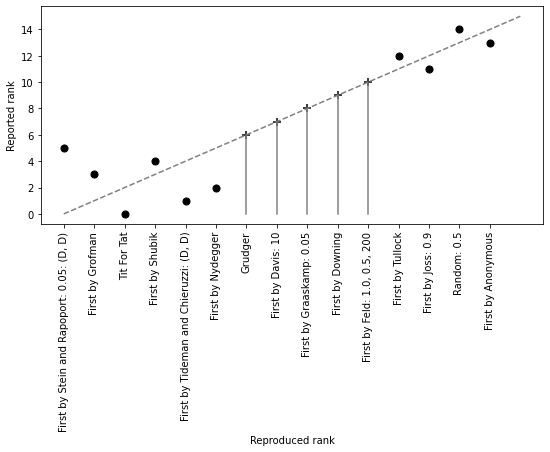

In [31]:
plt.figure(figsize=(9, 4))

plt.plot((0, 15), (0, 15), color="grey", linestyle="--")

for original_rank, strategy in enumerate(first_tournament_participants_ordered_by_reported_rank):
    rank = results.ranked_names.index(str(strategy))
    
    if rank == original_rank:
        symbol = "+"
        plt.plot((rank, rank), (rank, 0), color="grey")
    else:
        symbol = "o"
    plt.scatter([rank], [original_rank], marker=symbol, color="black", s=50) 

plt.xticks(
    range(number_of_strategies), 
    results.ranked_names, 
    rotation=90
)

plt.ylabel("Reported rank")
plt.xlabel("Reproduced rank")
plt.savefig("results_from_tournament.pdf", bbox_inches="tight")

# Number of matches

In [13]:
df = pd.read_csv("data/main.csv")
df.head()

,seed,number,self_interaction,Tit For Tat,First by Tideman and Chieruzzi,First by Nydegger,First by Grofman,First by Shubik,First by Stein and Rapoport,Grudger,First by Davis,First by Graaskamp,First by Downing,First by Feld,First by Joss,First by Tullock,First by Anonymous,Random
0,0,3,True,4,5,6,1,3,2,8,7,9,10,11,13,12,15,14
1,0,7,False,3,5,6,2,4,1,7,8,9,10,11,13,12,14,15
2,1,9,True,4,5,6,2,3,1,7,8,9,10,11,12,13,14,15
3,1,7,False,4,5,6,3,2,1,7,8,9,10,11,13,12,14,15
4,2,7,True,4,5,6,2,3,1,7,8,9,10,11,13,12,14,15


In [14]:
df["number"].max()

11

In [17]:
sum(df["number"] == df["number"].max()) / len(df.index) * 100

0.0018664567185654752

# Cooperation rates

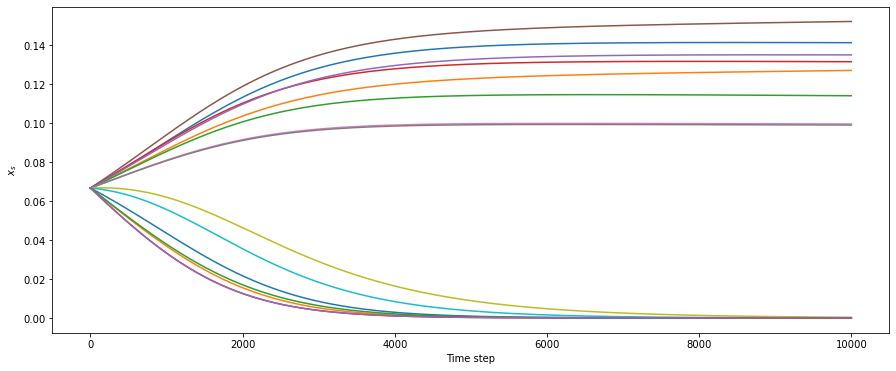

In [22]:
A = np.array(results.payoff_matrix)

import scipy.integrate

t = np.linspace(0, 10, 10_000)  # Obtain 10,000 time points

def dx(x, t=None, A=A):
    """
    Define the derivate of x according 
    to the replicator dynamic equations
    """
    return x * (A @ x - x @ A @ x.T)

xs = scipy.integrate.odeint(func=dx, y0=[1 / number_of_strategies for _ in A], t=t)

plt.figure(figsize=(15, 6))

plt.plot(xs)
plt.ylabel("$x_s$")
plt.xlabel("Time step");


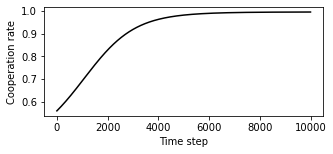

In [29]:
C = np.array(results.cooperation) / (number_of_turns * number_of_repetitions)

plt.figure(figsize=(5, 2))
plt.plot([x @ C @ x.T for x in xs], color="black")
plt.ylabel("Cooperation rate")
plt.xlabel("Time step")
plt.savefig("the_evolution_of_the_cooperation_rate.pdf", bbox_inches="tight")